# 1 Pre-processing

In [1]:
import pandas as pd
import numpy as np
import csv
import collections
import ast
from matplotlib import pyplot as plt

In [2]:
def str_to_actiontype(x):
    if isinstance(x, str):
        lst = list(set(ast.literal_eval(x))- {'NotSpecified'})
        lst = sorted(lst, key=str.lower)
        if lst == []:
            lst =  float('nan')
#         else:
#             lst = str(lst)
    else: # NaN
        lst = float('nan')
    return lst

In [3]:
df_list=[]

for i in range(1,16):
    p = 'p%s'%i
    df = pd.read_csv('Data_TagTog_Annotated/'+ p +'.csv', header=[0]) 
    df['folder'] = p
    df_list.append(df)  
    
df_raw = pd.concat(df_list).reset_index(drop=True)
del df_list    


df_total = df_raw.copy()

EVENTS = ['target', 'source', 'action',  'action_type', 'location', 'date',]
for col in EVENTS:
    df_total[col] = df_raw[col].apply(str_to_actiontype)

df_total

,id,is_relevant,target,source,action,action_type,location,date,country,year,news,folder,index
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[gunned, killed, killing]",[Armed Assault],[Karachi],[December 6],pakistan,2016,Two Lashkar e Jhangvi LeJ militants Asim alias...,p1,NaN
1,32398,True,"[civilians, Security Forces, SFs]",NaN,"[fighting, killed, killing, wounded]",[Unknown],NaN,[December 20],pakistan,2016,The Commander Southern Command Lieutenant Gene...,p1,NaN
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[attack, bomb, exploded, explosion]",[Bombing/Explosion],NaN,[August 30],india,2016,Meanwhile the underground organization Manipur...,p1,NaN
3,25445,True,"[Artisan Restaurant, foreigners, hostages]","[attackers, suicide fighters, suicide soldiers]","[gun battle, injuring, killing]",[Armed Assault],[Dhaka],"[27th, August]",bangladesh,2016,Islamic State IS in the latest issue of its on...,p1,NaN
4,31739,True,"[MQM, Muttahida Qaumi Movement]",NaN,[shot],[Assassination],"[Karachi, Korangi, Naeemabad, Sindh]",[June 19],pakistan,2016,A senior Muttahida Qaumi Movement MQM worker i...,p1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,10483,False,NaN,NaN,NaN,NaN,NaN,NaN,nepal,2015,Clashes between demonstrators and Police leave...,p15,a9qjjlMsQqy8XtuhYUJ6QMLlDz88-news_satp_15.tsv_46
7486,42333,False,NaN,NaN,NaN,NaN,NaN,NaN,india,2012,The death toll in the ongoing clashes between ...,p15,a6U4BlcbFbLRZKmdIMjCcxSEV7ni-news_satp_15.tsv_35
7487,21314,False,NaN,NaN,NaN,NaN,NaN,NaN,pakistan,2014,An unnamed security official revealed that Fro...,p15,aBikefqUY7LvQEJe5Sn96IE92aEK-news_satp_15.tsv_39
7488,58183,True,[Police],[militants],"[exploded, grenade]",[Bombing/Explosion],[Srinagar],[October 16],india,2011,Police said that militants hurled a grenade on...,p15,a8iR07wYXkm9CV3iPTxqGE4CaaMC-news_satp_15.tsv_52


In [4]:
# Expand action_types to multiple cols 
expand_df = df_total['action_type'].str.join(',').str.get_dummies(sep=',').astype(bool)
Action_Type = expand_df.columns
df_total[Action_Type] = expand_df
df_total

,id,is_relevant,target,source,action,action_type,location,date,country,year,...,index,Armed Assault,Assassination,Barricade Incident,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Kidnapping,Unarmed Assault,Unknown
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[gunned, killed, killing]",[Armed Assault],[Karachi],[December 6],pakistan,2016,...,NaN,True,False,False,False,False,False,False,False,False
1,32398,True,"[civilians, Security Forces, SFs]",NaN,"[fighting, killed, killing, wounded]",[Unknown],NaN,[December 20],pakistan,2016,...,NaN,False,False,False,False,False,False,False,False,True
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[attack, bomb, exploded, explosion]",[Bombing/Explosion],NaN,[August 30],india,2016,...,NaN,False,False,False,True,False,False,False,False,False
3,25445,True,"[Artisan Restaurant, foreigners, hostages]","[attackers, suicide fighters, suicide soldiers]","[gun battle, injuring, killing]",[Armed Assault],[Dhaka],"[27th, August]",bangladesh,2016,...,NaN,True,False,False,False,False,False,False,False,False
4,31739,True,"[MQM, Muttahida Qaumi Movement]",NaN,[shot],[Assassination],"[Karachi, Korangi, Naeemabad, Sindh]",[June 19],pakistan,2016,...,NaN,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,10483,False,NaN,NaN,NaN,NaN,NaN,NaN,nepal,2015,...,a9qjjlMsQqy8XtuhYUJ6QMLlDz88-news_satp_15.tsv_46,False,False,False,False,False,False,False,False,False
7486,42333,False,NaN,NaN,NaN,NaN,NaN,NaN,india,2012,...,a6U4BlcbFbLRZKmdIMjCcxSEV7ni-news_satp_15.tsv_35,False,False,False,False,False,False,False,False,False
7487,21314,False,NaN,NaN,NaN,NaN,NaN,NaN,pakistan,2014,...,aBikefqUY7LvQEJe5Sn96IE92aEK-news_satp_15.tsv_39,False,False,False,False,False,False,False,False,False
7488,58183,True,[Police],[militants],"[exploded, grenade]",[Bombing/Explosion],[Srinagar],[October 16],india,2011,...,a8iR07wYXkm9CV3iPTxqGE4CaaMC-news_satp_15.tsv_52,False,False,False,True,False,False,False,False,False


<b> Check if there is any row without news </b> 

In [5]:
row_no_news = df_total[df_total.news.isnull()==True]
row_no_news

,id,is_relevant,target,source,action,action_type,location,date,country,year,...,index,Armed Assault,Assassination,Barricade Incident,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Kidnapping,Unarmed Assault,Unknown
583,17790,False,NaN,NaN,NaN,NaN,NaN,NaN,bangladesh,2017,...,NaN,False,False,False,False,False,False,False,False,False
1363,11104,False,NaN,NaN,NaN,NaN,NaN,NaN,india,2018,...,NaN,False,False,False,False,False,False,False,False,False


<b> Check if there is any row without categories </b>


In [7]:
row_no_cat = df_total[(df_total[Action_Type].sum(axis=1)== 0) & (df_total['is_relevant'] == True)]
row_no_cat

,id,is_relevant,target,source,action,action_type,location,date,country,year,...,index,Armed Assault,Assassination,Barricade Incident,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Kidnapping,Unarmed Assault,Unknown
945,22482,True,"[Army personnel, joint search party, SFs]","[LeT, militants, terrorist]","[fire, fired, injured]",NaN,[Baramulla],[November 30],india,2017,...,NaN,False,False,False,False,False,False,False,False,False
1085,16325,True,[Driver],[militants],[assassinated],NaN,"[Ashtar, Daikundi]",[June 20],afghanistan,2018,...,NaN,False,False,False,False,False,False,False,False,False
1095,16388,True,"[guards, School, school]","[IS, Islamic State]","[beheaded, fire]",NaN,"[Khogyani, Nangarhar]",[July 1],afghanistan,2018,...,NaN,False,False,False,False,False,False,False,False,False
1132,15593,True,[civilians],[militant],"[attack, injured, killed, VBIED, Vehicle borne...",NaN,"[Helmand, Lashkargah]",[March 24],afghanistan,2018,...,NaN,False,False,False,False,False,False,False,False,False
1171,13166,True,[husband],"[Communist Party of India, Communist Party of ...","[beaten, killed, sticks]",NaN,"[Chhattisgarh, Sukma]",[November 7],india,2018,...,NaN,False,False,False,False,False,False,False,False,False
1259,12141,True,"[Special Police Officer, SPO]","[militant, Militants]","[attack, injured]",NaN,[Pulwama],[August 7],india,2018,...,NaN,False,False,False,False,False,False,False,False,False
1292,16993,True,[fuel tanker],[Taliban],"[seized, torched]",NaN,NaN,[November 13],afghanistan,2018,...,NaN,False,False,False,False,False,False,False,False,False
1365,12357,True,NaN,NaN,NaN,NaN,NaN,NaN,india,2018,...,NaN,False,False,False,False,False,False,False,False,False
1960,31193,True,"[others, security personnel]",[militants],"[injured, killed]",NaN,"[Kahan, Kohlu]",[February 17],pakistan,2016,...,NaN,False,False,False,False,False,False,False,False,False
1998,28014,True,[worker],[militants],[abducted],NaN,"[Kabul, Taimani]",[June 9],india,2016,...,NaN,False,False,False,False,False,False,False,False,False


In [8]:
filter_idx = set(df_total.index) - set(row_no_news.index) - set(row_no_cat.index)
df_total = df_total.loc[filter_idx].reset_index(drop= True)
df_total

,id,is_relevant,target,source,action,action_type,location,date,country,year,...,index,Armed Assault,Assassination,Barricade Incident,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Kidnapping,Unarmed Assault,Unknown
0,32355,True,"[Military Police, Rangers]","[Lashkar e Jhangvi LeJ, militants]","[gunned, killed, killing]",[Armed Assault],[Karachi],[December 6],pakistan,2016,...,NaN,True,False,False,False,False,False,False,False,False
1,32398,True,"[civilians, Security Forces, SFs]",NaN,"[fighting, killed, killing, wounded]",[Unknown],NaN,[December 20],pakistan,2016,...,NaN,False,False,False,False,False,False,False,False,True
2,29171,True,"[Naga, Nagas]","[Manipur Naga Peopleâ€™s Front, MNPF]","[attack, bomb, exploded, explosion]",[Bombing/Explosion],NaN,[August 30],india,2016,...,NaN,False,False,False,True,False,False,False,False,False
3,25445,True,"[Artisan Restaurant, foreigners, hostages]","[attackers, suicide fighters, suicide soldiers]","[gun battle, injuring, killing]",[Armed Assault],[Dhaka],"[27th, August]",bangladesh,2016,...,NaN,True,False,False,False,False,False,False,False,False
4,31739,True,"[MQM, Muttahida Qaumi Movement]",NaN,[shot],[Assassination],"[Karachi, Korangi, Naeemabad, Sindh]",[June 19],pakistan,2016,...,NaN,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7438,10483,False,NaN,NaN,NaN,NaN,NaN,NaN,nepal,2015,...,a9qjjlMsQqy8XtuhYUJ6QMLlDz88-news_satp_15.tsv_46,False,False,False,False,False,False,False,False,False
7439,42333,False,NaN,NaN,NaN,NaN,NaN,NaN,india,2012,...,a6U4BlcbFbLRZKmdIMjCcxSEV7ni-news_satp_15.tsv_35,False,False,False,False,False,False,False,False,False
7440,21314,False,NaN,NaN,NaN,NaN,NaN,NaN,pakistan,2014,...,aBikefqUY7LvQEJe5Sn96IE92aEK-news_satp_15.tsv_39,False,False,False,False,False,False,False,False,False
7441,58183,True,[Police],[militants],"[exploded, grenade]",[Bombing/Explosion],[Srinagar],[October 16],india,2011,...,a8iR07wYXkm9CV3iPTxqGE4CaaMC-news_satp_15.tsv_52,False,False,False,True,False,False,False,False,False


<b> Checking for other missing values.  </b>

id, is_relevant must be valid values. While others are optional.

In [15]:
missing_values_check = df_total.isnull().sum()
print(missing_values_check)

id                                   0
is_relevant                          0
target                            5934
source                            6124
action                            5893
action_type                       5893
location                          5970
date                              6081
country                              0
year                                 0
news                                 0
folder                               0
index                             5964
Armed Assault                        0
Assassination                        0
Barricade Incident                   0
Bombing/Explosion                    0
Facility/Infrastructure Attack       0
Hijacking                            0
Kidnapping                           0
Unarmed Assault                      0
Unknown                              0
dtype: int64


# 2. Define Columns; Reduce types

In [9]:
select_cols = ['news','is_relevant', 'Armed Assault', 'Assassination', 'Barricade Incident',
       'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking',
       'Kidnapping', 'Unarmed Assault', 'Unknown']
df = df_total[select_cols]
df

,news,is_relevant,Armed Assault,Assassination,Barricade Incident,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Kidnapping,Unarmed Assault,Unknown
0,Two Lashkar e Jhangvi LeJ militants Asim alias...,True,True,False,False,False,False,False,False,False,False
1,The Commander Southern Command Lieutenant Gene...,True,False,False,False,False,False,False,False,False,True
2,Meanwhile the underground organization Manipur...,True,False,False,False,True,False,False,False,False,False
3,Islamic State IS in the latest issue of its on...,True,True,False,False,False,False,False,False,False,False
4,A senior Muttahida Qaumi Movement MQM worker i...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7438,Clashes between demonstrators and Police leave...,False,False,False,False,False,False,False,False,False,False
7439,The death toll in the ongoing clashes between ...,False,False,False,False,False,False,False,False,False,False
7440,An unnamed security official revealed that Fro...,False,False,False,False,False,False,False,False,False,False
7441,Police said that militants hurled a grenade on...,True,False,False,False,True,False,False,False,False,False


Barricade Incident                  2
Hijacking                          10
Unarmed Assault                    58
Assassination                      61
Kidnapping                        130
Facility/Infrastructure Attack    135
Unknown                           156
Bombing/Explosion                 579
Armed Assault                     659
dtype: int64

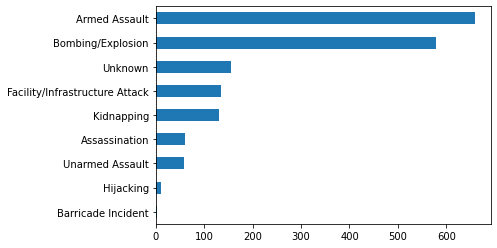

In [10]:
df[Action_Type].sum().sort_values().plot.barh()
df[Action_Type].sum().sort_values()

In [11]:
df_reduced = df.copy()
Reduced_Action_Types = ['Armed Assault','Bombing/Explosion','Kidnapping','Other']

df_reduced['Kidnapping'] = df[['Hijacking', 'Barricade Incident', 'Kidnapping']].any(axis=1)

df_reduced['Other'] = df[['Assassination', 'Unarmed Assault',
                          'Facility/Infrastructure Attack', 'Unknown']].any(axis=1)

REDUCED_COLS = ['news']+ ['is_relevant'] + Reduced_Action_Types
df_reduced = df_reduced.loc[:, REDUCED_COLS]
df_reduced

,news,is_relevant,Armed Assault,Bombing/Explosion,Kidnapping,Other
0,Two Lashkar e Jhangvi LeJ militants Asim alias...,True,True,False,False,False
1,The Commander Southern Command Lieutenant Gene...,True,False,False,False,True
2,Meanwhile the underground organization Manipur...,True,False,True,False,False
3,Islamic State IS in the latest issue of its on...,True,True,False,False,False
4,A senior Muttahida Qaumi Movement MQM worker i...,True,False,False,False,True
...,...,...,...,...,...,...
7438,Clashes between demonstrators and Police leave...,False,False,False,False,False
7439,The death toll in the ongoing clashes between ...,False,False,False,False,False
7440,An unnamed security official revealed that Fro...,False,False,False,False,False
7441,Police said that militants hurled a grenade on...,True,False,True,False,False


Kidnapping           140
Other                382
Bombing/Explosion    579
Armed Assault        659
dtype: int64

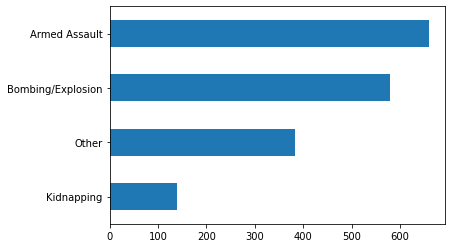

In [12]:
df_reduced[Reduced_Action_Types].sum().sort_values().plot.barh()
df_reduced[Reduced_Action_Types].sum().sort_values()

 # Save csv

In [13]:
df.to_csv("Data_MachineLearning/df_all.csv", header=True, index = False)
df_reduced.to_csv("Data_MachineLearning/df_reduced.csv", header=True, index = False)

In [64]:
df_total[1:2][['folder','id', 'index']]

,folder,id,index
1,p1,32398,NaN


In [60]:
df_total[df_total.news.isnull()==True][['folder','id', 'index']]

,folder,id,index
583,p2,17790,NaN
1356,p3,11104,NaN


In [21]:
df["news"]

0       Two Lashkar e Jhangvi LeJ militants Asim alias...
1       The Commander Southern Command Lieutenant Gene...
2       Meanwhile the underground organization Manipur...
3       Islamic State IS in the latest issue of its on...
4       A senior Muttahida Qaumi Movement MQM worker i...
                              ...                        
7440    Clashes between demonstrators and Police leave...
7441    The death toll in the ongoing clashes between ...
7442    An unnamed security official revealed that Fro...
7443    Police said that militants hurled a grenade on...
7444    A recently constituted task force on missing p...
Name: news, Length: 7445, dtype: object

In [33]:
a = df["news"].str.contains(u"\u2018")== True
a
# df["news"][a]

0       False
1       False
2       False
3       False
4        True
        ...  
7440    False
7441    False
7442    False
7443    False
7444    False
Name: news, Length: 7445, dtype: bool

In [44]:
b = df["news"][a][4]

In [45]:
b

'A senior Muttahida Qaumi Movement MQM worker identified as Sohail Rasheed 30 was shot dead near his home in Naeemabad in Korangi Town of Karachi the provincial capital of Sindh on June 19 reports Dawn MQM spokesperson Amin ul Haq described it as a ‘targeted killing’ of the worker and said that the victim was a joint unit in charge in Union Council 29'

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

def keepAlpha(sentence):  # Remove non-alphabetic characters
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

keepAlpha(b)

'A senior Muttahida Qaumi Movement MQM worker identified as Sohail Rasheed   was shot dead near his home in Naeemabad in Korangi Town of Karachi the provincial capital of Sindh on June   reports Dawn MQM spokesperson Amin ul Haq described it as a  targeted killing  of the worker and said that the victim was a joint unit in charge in Union Council'

In [ ]:
df.news = df.news.str.replace(u"\u2018", "")\
.str.replace(u"\u2019", "")\
.str.replace(u"\u201c", "")\
.str.replace(u"\u201d", "")

In [ ]:
df.news = df.news.str.replace(u"\u2018", "")\
.str.replace(u"\u2019", "")\
.str.replace(u"\u201c", "")\
.str.replace(u"\u201d", "")

# Split to train/dev/test

In [76]:
df_reduced.news = df_reduced.news.str.replace(u"\u2018", "")\
.str.replace(u"\u2019", "")\
.str.replace(u"\u201c", "")\
.str.replace(u"\u201d", "")


In [77]:
df_train, df_valid, df_test = np.split(
    df_reduced.sample(frac=1, random_state=42), 
    [int(.8*len(df_reduced)), int(.9*len(df_reduced))]  # 80%, 10%, 10%
#     [int(.6*len(df)), int(.8*len(df))])  # 60%, 20%, 20%
)

In [52]:
df_train.to_csv("data3/train.csv", header=True, index = False)
df_valid.to_csv("data3/valid.csv", header=True, index = False)
df_test.to_csv("data3/test.csv", header=True, index = False)

In [80]:
# df_test

,news,is_relevant,Armed Assault,Assassination,Barricade Incident,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Kidnapping,Unarmed Assault,Unknown,Other
1540,A Communist Party of India Maoist (CPI Maoist)...,True,True,False,False,False,False,False,False,False,False,False
1217,The Army chief who had returned from three day...,False,False,False,False,False,False,False,False,False,False,False
2681,The Counter Terrorism Department (CTD) on July...,False,False,False,False,False,False,False,False,False,False,False
2993,"One person, identified as D. Koshozü was arres...",False,False,False,False,False,False,False,False,False,False,False
5512,An investigation officer (IO) of 21 August Gre...,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5191,"Investigators probing the July 10, 2014 bomb b...",False,False,False,False,False,False,False,False,False,False,False
5226,In a breakthrough in the 13 7 serial blasts ca...,False,False,False,False,False,False,False,False,False,False,False
5390,Times of India reports that the Communist Part...,True,False,False,False,False,True,False,False,False,False,True
860,Major three political parties on January 21 ag...,False,False,False,False,False,False,False,False,False,False,False


In [79]:
# import json
# result = df_test[1:4].copy().to_json(orient='index')
# parsed = json.loads(result)
# json.dumps(parsed, indent=4) 
# df_test[1:4].copy().to_json(orient='index')

'{"1217":{"news":"The Army chief who had returned from three day tour of Nepal yesterday February 15 and held high level review of security situation in Jammu and Kashmir especially the Line of Control LoC in twin border districts of Rajouri and Poonch was reported to have told the youth that some external forces a point towards Pakistan were trying to misguide the youth of Jammu and Kashmir and that they shouldnt fall in their trap as it would spoil their career General Rawat advised the school children to desist from terrorism and stone pelting and reminded them that certain external forces are creating differences and misguiding the youths and that it was their the students duty to thwart mischievous designs of the enemy as they have to build their career Terrorism has never benefitted anyone It is only the common man who has to suffer because of these activities and we will not let it to happen  the Army chief said while interacting with visiting students from schools of the border

# Split train/test

In [11]:
df.news = df.news.str.replace(u"\u2018", "")\
.str.replace(u"\u2019", "")\
.str.replace(u"\u201c", "")\
.str.replace(u"\u201d", "")

/home/yibo/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df_train = df.sample(frac=0.8,random_state=200) #random state is a seed value
df_test = df.drop(df_train.index)

Barricade Incident                  1
Hijacking                           8
Unarmed Assault                    44
Assassination                      52
Facility/Infrastructure Attack     97
Kidnapping                        105
Unknown                           126
Bombing/Explosion                 450
Armed Assault                     516
dtype: int64

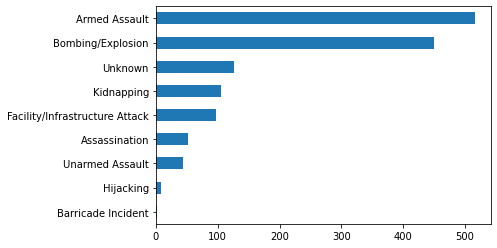

In [13]:
df_train[Action_Type].sum().sort_values().plot.barh()
df_train[Action_Type].sum().sort_values()

Barricade Incident                  1
Hijacking                           2
Assassination                       9
Unarmed Assault                    14
Kidnapping                         25
Unknown                            30
Facility/Infrastructure Attack     38
Bombing/Explosion                 129
Armed Assault                     143
dtype: int64

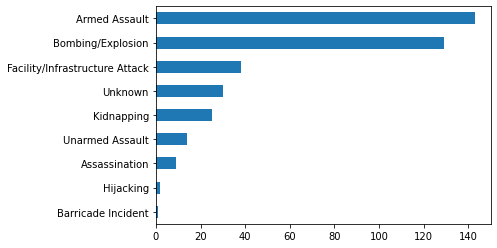

In [14]:
df_test[Action_Type].sum().sort_values().plot.barh()
df_test[Action_Type].sum().sort_values()

In [15]:
df_train.to_csv("Data_MachineLearning/df_train.csv", header=True, index = False)
df_test.to_csv("Data_MachineLearning/df_test.csv", header=True, index = False)

In [16]:
df_train.to_csv("save_not_reduced_bert/train.csv", header=True, index = False)
df_test.to_csv("save_not_reduced_bert/test.csv", header=True, index = False)

In [11]:
df_reduced.news = df_reduced.news.str.replace(u"\u2018", "")\
.str.replace(u"\u2019", "")\
.str.replace(u"\u201c", "")\
.str.replace(u"\u201d", "")

In [12]:
df_train = df_reduced.sample(frac=0.8,random_state=100) #random state is a seed value
df_test = df_reduced.drop(df_train.index)

Kidnapping           112
Other                298
Bombing/Explosion    467
Armed Assault        512
dtype: int64

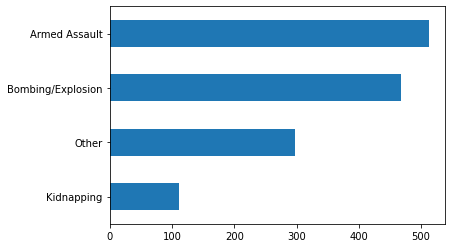

In [13]:
df_train[Reduced_Action_Types].sum().sort_values().plot.barh()
df_train[Reduced_Action_Types].sum().sort_values()

Kidnapping            28
Other                 84
Bombing/Explosion    112
Armed Assault        147
dtype: int64

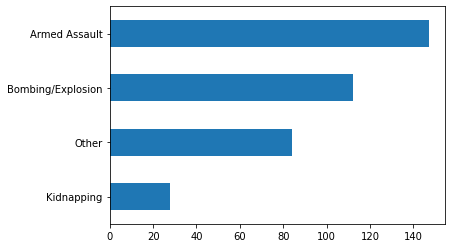

In [14]:
df_test[Reduced_Action_Types].sum().sort_values().plot.barh()
df_test[Reduced_Action_Types].sum().sort_values()

In [15]:
df_train.to_csv("Data_MachineLearning/df_train_reduced.csv", header=True, index = False)
df_test.to_csv("Data_MachineLearning/df_test_reduced.csv", header=True, index = False)

In [16]:
df_train.to_csv("data/train.csv", header=True, index = False)
df_test.to_csv("data/test.csv", header=True, index = False)

In [20]:
df_train

,news,is_relevant,Armed Assault,Bombing/Explosion,Kidnapping,Other
6881,At least 24 Shia pilgrims returning from Iran ...,True,False,True,False,False
2230,Three leaders of United Democratic Madhesi Fro...,False,False,False,False,False
2501,Rapid Action Battalion (RAB) arrested a Hijb u...,False,False,False,False,False
1379,The Pakistan origin member of the House of Lor...,False,False,False,False,False
3438,The Communist Party of IndiaMaoist (CPIMaoist)...,True,True,False,True,False
...,...,...,...,...,...,...
6113,"In another incident, a 25 year old man, identi...",False,False,False,False,False
1973,Armed militants abducted a tipper driver of Si...,True,False,False,True,False
4771,Two people were killed and 20 others injured w...,True,False,True,False,False
5117,As part of the implementation of the National ...,False,False,False,False,False


In [28]:
1-df_test['is_relevant'].sum()/ df_test['is_relevant'].count()

0.7777031564808596